# Objectives

#### Build an interpretable linear regression model to understand factors influencing students final score

# Importing Python libraries

In [4]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import numpy as np

# Loading data

In [5]:
data = pd.read_csv("C:/Users/sinch/AppData/Local/Packages/5319275A.WhatsAppDesktop_cv1g1gvanyjgm/LocalState/sessions/63139AC3A9C7AEE1A04DBF14E9D0E721C30A7F84/transfers/2026-04/DS_Projects/student_performance_regression.csv" , encoding='ISO-8859-1')
data

,hours_studied,attendance_percent,assignments_completed,mock_test_score,participation_level,final_score
0,7,86,5,68,5,119.277018
1,7,75,9,70,3,117.229348
2,2,93,5,43,1,63.597048
3,5,91,8,57,5,100.436075
4,7,85,1,59,5,102.851851
...,...,...,...,...,...,...
495,5,79,5,64,2,88.421832
496,6,86,2,62,5,106.355570
497,1,65,1,51,2,59.363726
498,4,86,9,73,5,116.318664


# Data preview

In [7]:
data.head()

,hours_studied,attendance_percent,assignments_completed,mock_test_score,participation_level,final_score
0,7,86,5,68,5,119.277018
1,7,75,9,70,3,117.229348
2,2,93,5,43,1,63.597048
3,5,91,8,57,5,100.436075
4,7,85,1,59,5,102.851851


# Data information

In [8]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 500 entries, 0 to 499
Data columns (total 6 columns):
 #   Column                 Non-Null Count  Dtype  
---  ------                 --------------  -----  
 0   hours_studied          500 non-null    int64  
 1   attendance_percent     500 non-null    int64  
 2   assignments_completed  500 non-null    int64  
 3   mock_test_score        500 non-null    int64  
 4   participation_level    500 non-null    int64  
 5   final_score            500 non-null    float64
dtypes: float64(1), int64(5)
memory usage: 23.6 KB


#### There is no null values and all values are numeric

# Descriptive Statistics

In [10]:
data.describe()

,hours_studied,attendance_percent,assignments_completed,mock_test_score,participation_level,final_score
count,500.000000,500.000000,500.000000,500.000000,500.000000,500.000000
mean,4.152000,79.738000,4.950000,66.242000,3.034000,90.069004
std,2.000224,11.096288,2.660386,15.822647,1.408834,15.067186
min,1.000000,60.000000,1.000000,40.000000,1.000000,47.528720
25%,2.000000,71.000000,2.000000,52.000000,2.000000,79.579426
50%,4.000000,80.000000,5.000000,65.000000,3.000000,89.394961
75%,6.000000,88.000000,7.000000,80.000000,4.000000,100.423233
max,7.000000,99.000000,9.000000,94.000000,5.000000,132.941860


# Train test split

In [14]:
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error , r2_score

In [15]:
X1 = data['hours_studied'].values
Y1 = data['final_score'].values

In [16]:
X1 = X1.reshape(-1,1)

In [17]:
X1_train , X1_test , Y1_train , Y1_test = train_test_split(X1,Y1 , test_size=0.20)

In [18]:
lr = LinearRegression()
lr.fit(X1_train , Y1_train)

LinearRegression()

In [19]:
y_pred = lr.predict(X1_test)

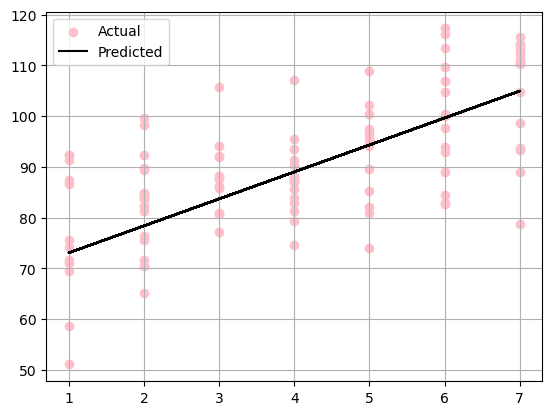

In [20]:
plt.scatter(X1_test , Y1_test , color='pink' , label = 'Actual')
plt.plot(X1_test , y_pred , color='black' , label = 'Predicted')
plt.legend()
plt.grid(True)

# Model performance

In [28]:
X = data['hours_studied'].values
Y = data['final_score'].values

mean_x = np.mean(X)
mean_y = np.mean(Y)

n = len(X)

numer = 0
denom = 0

for i in range(n):
    numer += (X[i]-mean_x)*(Y[i]-mean_y)
    denom += (X[i]-mean_x)**2

m = numer/denom
c = mean_y -(m * mean_x)

print(f"m:{m}")
print(f"c:{c}")

m:5.100969336110841
c:68.88977902717882


In [29]:
ss_tot = 0
ss_res = 0

for i in range(n):
    y_pred = (m * X[i]) + c
    ss_tot += (Y[i] - mean_y) ** 2
    ss_res += (Y[i] - y_pred) ** 2

r2 = 1 - (ss_res/ss_tot)
print(f"r2 = {r2}")

r2 = 0.4585625745799654


## R2 indicates ~45% of varience explained